# WGAN

## Likelihood and KL Divergence
Let's see generative models in a different way. For generative models, we want to
- maximize the **likelihood** of our training data, that is, to generate training data as possible.
Or we can say we want to
- minimize the **distance** of the two distributions.


For generative models, the **training data** $x^1,x^2,...,x^m$ is our observation. We want to maximize the likelihood of our training data. Likelihood here is **the probability that the model assigns to the training data** $\Pi_{i=1}^m \mathbb{P}_{model}(x^i;\theta)$.
$$
\begin{aligned}
\theta^* & = \arg\max_{\theta}\Pi_{i=1}^m \mathbb{P}_{model}(x^i;\theta) \\
    & = \arg\max_{\theta} \Sigma_{i=1}^m \log \mathbb{P}_{model}(x^i;\theta).
\end{aligned}
$$
The **divergence** can be intuitively thought as the "distance" of two probability distribution. **KL-divergence** is defined by
$$
\begin{aligned}
KL(p||q)& \dot{=}\int_{-\infty}^{\infty} p(x)\log\frac{p(x)}{q(x)}d\mu(x)\\
    & = \mathbb{E}_{x\sim p(x)} \log\frac{p(x)}{q(x)}.
\end{aligned}
$$
**What's the relation between likelihood and KL divrgence**? Let's look at the proposition:

**Proposition** Minimizing KL divergence is equivalent to maximizing likelihood.
$$
\begin{aligned}
    & \arg\min_{\hat{\theta}} KL(p(x|\theta^*) || p(x|\hat{\theta})) \\
    & = \arg\min_{\hat{\theta}} \mathbb{E}_{x\sim p(x|\theta^*)} \left[\log\frac{p(x|\theta^*)}{p(x|\hat{\theta})}\right] \\
    & = \arg\min_{\hat{\theta}} \mathbb{E}_{x\sim p(x|\theta^*)}\left[\log p(x|\theta^*)-\log p(x|\hat{\theta})\right] \\
    & = \arg\min_{\hat{\theta}} \mathbb{E}_{x\sim p(x|\theta^*)}\left[-\log p(x|\hat{\theta})\right] \\
    & = \arg\max_{\hat{\theta}} \mathbb{E}_{x\sim p(x|\theta^*)}\left[\log p(x|\hat{\theta})\right]
\end{aligned}
$$

The optimal parameters $\theta^*$ is independent of the $\hat{\theta}$, so the equation holds if we get rid of $\log p(x|\theta^*)$.

## Motivation
We've shown that minimizing KL divergence is equivalent to maximizing likelihood. Can we simply calculate KL divergence, calculate the gradient of KL divergence, and then update model parameters with gradient? The answer is no if we use KL divergence.

Let $\mathcal{X}$ be a compact metric space such as $[0,1]^d$. In the following discussion, we only consider the probability measures defined on $\mathcal{X}$. We can view $\mathcal{X}$ as our image space.

**Theorem** A sequence of distributions $\mathbb{P}_t$ converges with respect to $\rho$ if and only if there exists a distribution $\mathbb{P}_{\infty}$ such that $\rho(\mathbb{P}_t,\mathbb{P}_{\infty})\to 0$ as $t\to\infty$.

Does such divergence exist? Yes, **Earth-Mover** (EM) distance or **Wasserstein-1** ($W_1$) distance has silimar property. $W_1$ distance is defined as
$$
W(\mathbb{P}_r,\mathbb{P}_g)=\inf_{\gamma\sim\Pi(\mathbb{P}_r,\mathbb{P}_g)} \mathbb{E}_{(x,y)\sim\gamma}\left[||x-y||\right].
$$
where $\Pi(\mathbb{P}_r,\mathbb{P}_g)$ denotes the set of all joint distributions $\gamma(x,y)$ whose marginals are respectively $\mathbb{P}_r$ and $\mathbb{P}_g$, that is,
$$
\begin{aligned}
& \int_{\mathcal{X}} \gamma(x,y)dy=\mathbb{P}_g \\
& \int_{\mathcal{X}} \gamma(x,y)dx=\mathbb{P}_r.
\end{aligned}
$$
Intuitively, $\gamma(x,y)$ indicates how much “mass” must be transported from $x$ to $y$ in order to transform the distributions $\mathbb{P}_r$ into the distribution $\mathbb{P}_g$. The EM distance then is the “**cost**” of the optimal transport plan.

We'll compare $W_1$ distance with other popular distances.

**KL divergence**
$$
KL(\mathbb{P}_r || \mathbb{P}_g)=\int \log\frac{P_r(x)}{P_g(x)}P_r(x)d\mu(x)
$$
where both $\mathbb{P}_r$ and $\mathbb{P}_g$ are assumed to be absolutely continuous, and therefore admit **densities**, with respect to a same measure $\mu$ defined on $\mathcal{X}$.
  
**Jensen-Shannon** (JS) divergence
$$
JS(\mathbb{P}_r,\mathbb{P}_g)=KL(\mathbb{P}_r||\mathbb{P}_m)+KL(\mathbb{P}_g||\mathbb{P}_m)
$$
where $\mathbb{P}_m=\frac{\mathbb{P}_r+\mathbb{P}_g}{2}$.
  
**Total Variation** (TV) distance
$$
\delta(\mathbb{P}_r,\mathbb{P}_g)=\sup_{A\in\Sigma} |\mathbb{P}_r(A)-\mathbb{P}_g(A)|
$$
$\Sigma$ denotes the set of all the Borel subsets of a compact metric set $\mathcal{X}$.


### Example
Let $Z\sim U[0,1]$ the uniform distribution on the unit interval. Let $\mathbb{P}_0$ be the distribution of $(0,Z) \in \mathbb{R}^2$ (a $0$ on the x-axis and the random variable $Z$ on the y-axis), uniform on a straight vertical line passing through the origin. Let $g_{\theta}(z) = (\theta,z)$ with $\theta$ a single real parameter. Let $\mathbb{P}_{\theta}$ be the distribution of $g_{\theta}$. In this case,


$W_1$ distance: $W(\mathbb{P}_0,\mathbb{P}_{\theta})=|\theta|$

**Proof**: Let $x\sim\mathbb{P}_0$, $y\sim\mathbb{P}_{\theta}$ and $\gamma$ be a joint distribution of $\mathbb{P}_0$ and $\mathbb{P}_{\theta}$. No matter what $\gamma$ is, $\|x-y\|$ is always $\theta$. $\theta$ is a constant with respect to $\gamma$, and the expectation of a probability distribution is always 1. Thus,
$$
\mathbb{E}_{(x,y)\sim\gamma} |\theta|=\int_{\omega\in\mathcal{X}} |\theta| d\omega = |\theta| \int_{\omega\in\mathcal{X}}d\omega=\|\theta\|\blacksquare
$$


KL divergence:
$$
KL(\mathbb{P}_0||\mathbb{P}_{\theta})=KL(\mathbb{P}_{\theta}||\mathbb{P}_0)
    \begin{cases}
        \infty & \text{if }\theta\neq 0 \\
        0 & \theta=0
    \end{cases}
$$
**Proof**:
$$
\begin{aligned}
KL(\mathbb{P}_0||\mathbb{P}_{\theta}) & =\int_{\omega\in\mathcal{X}} \mathbb{P}_0(\omega)\log\frac{\mathbb{P}_0(\omega)}{\mathbb{P}_{\theta}(\omega)}=\int_{(x,y)\in\mathbb{R}^2} \mathbb{P}_0(x,y)\log\frac{\mathbb{P}_0(x,y)}{\mathbb{P}_{\theta}(x,y)} \\ & = \int_{(x,y)\in [0,\theta]\times [0,1]} \mathbb{P}_0(x,y)\log\frac{\mathbb{P}_0(x,y)}{\mathbb{P}_{\theta}(x,y)} = \int_{y\in[0,1]} \mathbb{P}_0(0,y)\log\frac{\mathbb{P}_0(0,y)}{\mathbb{P}_{\theta}(0,y)}+\int_{y\in[0,1]} \mathbb{P}_0(\theta,y)\log\frac{\mathbb{P}_0(\theta,y)}{\mathbb{P}_{\theta}(\theta,y)}
\end{aligned}
$$
If $\theta\neq 0$, $\mathbb{P}_{\theta}(0,y)$ and $\mathbb{P}_0(\theta,y)$ are always 0 for all $y\in[0,1]$. The first term is arbitrarily large (infinity) and the second term is 0, so KL divergence is $+\infty$.

For $\theta=0$,
$$
KL(\mathbb{P}_0||\mathbb{P}_{\theta})=\int_{y\in[0,1]} \mathbb{P}_0(0,y)\log\frac{\mathbb{P}_0(0,y)}{\mathbb{P}_{\theta}(0,y)}=\int_{y\in[0,1]} \mathbb{P}_0(0,y)\log 1 = 0.
$$
Similar calculation for $KL(\mathbb{P}_{\theta}||\mathbb{P}_0)\blacksquare$.

JS divergence:
$$
JS(\mathbb{P}_0,\mathbb{P}_{\theta})=
        \begin{cases}
        \log 2 & \text{if }\theta\neq 0 \\
        0 & \theta=0
        \end{cases}
$$
**Proof**:
$$
JS(\mathbb{P}_r,\mathbb{P}_g)=KL(\mathbb{P}_r||\mathbb{P}_m)+KL(\mathbb{P}_g||\mathbb{P}_m)
$$
For $\theta=0$, $\frac{\mathbb{P}_0+\mathbb{P}_{\theta}}{2}=\mathbb{P}_0$, so JS divergence is 0. Suppose $\theta\neq 0$.
$$
\begin{aligned}
& \int_{y\in[0,1]} \mathbb{P}_0(0,y)\log\frac{\mathbb{P}_0(0,y)}{\frac{\mathbb{P}_0(0,y)+\mathbb{P}_{\theta}(0,y)}{2}} \\
& = \int_{y\in[0,1]} \mathbb{P}_0(0,y)\log\frac{\mathbb{P}_0(0,y)}{\frac{\mathbb{P}_0(0,y)+0}{2}} \\
& = \int_{y\in[0,1]} \mathbb{P}_0(0,y)\log 2 \\
& = \log 2,
\end{aligned}
$$
and the calculation is similar for $KL(\mathbb{P}_{\theta} || \frac{\mathbb{P}_0+\mathbb{P}_{\theta}}{2})\blacksquare$.

TV distance:
$$
\delta(\mathbb{P}_0,\mathbb{P}_{\theta})=
        \begin{cases}
        1 & \text{if }\theta\neq 0 \\
        0 & \theta=0
        \end{cases}
$$
**Proof**: Recall that
$$
\mathbb{P}_r(A)=\int_A \mathbb{P}_r(x)d\mu(x).
$$
$\mathbb{P}_0$ and $\mathbb{P}_{\theta}$ are defined on $\mathbb{R}^2$ and are non-zero on $x=0$ and $x=\theta$ respectively. For each $y\in\mathbb{R}$, $\{(x,y) | x\in\mathbb{R}\}$ is a Borel subset. If $\theta=0$, then $\mathbb{P}_0=\mathbb{P}_{\theta}$ and $\delta(\mathbb{P}_0,\mathbb{P}_{\theta})=0$. For $\theta\neq 0$,
$$
\delta(\mathbb{P}_0,\mathbb{P}_{\theta})_{x=0}=|1-0|=1,
$$
and
$$
\delta(\mathbb{P}_0,\mathbb{P}_{\theta})_{x=\theta}=|0-1|=1. \blacksquare
$$
What can we learn from this example? We know that we can learn a probability distribution over a low dimensional manifold by doing gradient descent on the $W_1$ distance. This cannot be done with the other distances and divergences because the resulting loss function is not even continuous.

**Theorem** Let $\mathbb{P}_r$ be a fixed distribution over $\mathcal{X}$. Let $Z$ be a random variable (e.g Gaussian) over another space $\mathcal{Z}$. Let $g : \mathcal{Z} \times \mathbb{R}^d \to \mathcal{X}$ be a function, that will be denoted $g_{\theta}(z)$ with $z$ the first coordinate and $\theta$ the second. Let $\mathbb{P}_{\theta}$ denote the distribution of $g_{\theta}(Z)$. Then,
1. $g$ is continuous in $\theta$, and so is $W(\mathbb{P}_0,\mathbb{P}_{\theta})$.
2. If $g$ is locally Lipschitz and satisfies regularity assumption 1, then $W(\mathbb{P}_0,\mathbb{P}_{\theta})$
is continuous everywhere, and differentiable almost everywhere.
3. Statements 1. and 2. are false for the Jensen-Shannon divergence $JS(\mathbb{P}_0,\mathbb{P}_{\theta})$ and all the KLs.

**Corollary** Let $g_{\theta}$ be any feedforward neural network4 parameterized by $\theta$, and $p(z)$ a prior over $z$ such that $\mathbb{E}_{z\sim p(z)}[\|z\|]<\infty$ (e.g. Gaussian, uniform, etc.). Then assumption 1 is satisfied and therefore $W(\mathbb{P}_0,\mathbb{P}_{\theta})$ is continuous everywhere and differentiable almost everywhere.

## WGAN
By the Kantorovich-Rubinstein duality,
$$
W(\mathbb{P}_r,\mathbb{P}_{\theta}) = \sup_{||f||_L\leq 1} \mathbb{E}_{x\sim\mathbb{P}_r}[f(x)]-\mathbb{E}_{x\sim\mathbb{P}_{\theta}}[f(x)].
$$
If we replace $\|f\|_L\leq 1$ by $\|f\|_L\leq K$, then we end up with $K\cdot W(\mathbb{P}_r,\mathbb{P}_{\theta})$. The gradient is scaled but its direction does not change. Let $f_w$ denote the neural network with parameters $w$. We could consider solving
$$
\max_{w\in\mathcal{W}} \mathbb{E}_{x\sim\mathbb{P}_r}[f_w(x)]-\mathbb{E}_{z\sim \mathbb{P}_z}[f_w(g_{\theta}(z))]
$$
where we restrict the range of parameters. For example, we restrict $\mathcal{W}\in [-0.01,0.01]^l$ so that $\frac{\partial f_w}{\partial w_i}$ are bounded and the gradient is Lipschitz. If the supremum is attained for some $w\in\mathcal{W}$, then this process would yield a calculation of $W(\mathbb{P}_0,\mathbb{P}_{\theta})$ up to a multiplicative constant.

***Theorem** Let $\mathbb{P}_r$ be any distribution. Let $\mathbb{P}_{\theta}$ be the distribution of $g_{\theta}(Z)$ with $Z$ a random variable with density $p$ and $g_{\theta}$ a function satisfying assumption 1. Then, there is a solution $f \colon \mathcal{X} \to \mathbb{R}$ to the problem
$$
\max_{||f||_L\leq 1} \mathbb{E}_{x\sim\mathbb{P}_r}[f(x)]-\mathbb{E}_{x\sim\mathbb{P}_{\theta}}[f(x)]
$$
and we have
$$
\nabla_{\theta} W(\mathbb{P}_r,\mathbb{P}_{\theta})=-\mathbb{E}_{z\sim \mathbb{P}_z}[f_w(g_{\theta}(z))]
$$
when both terms are well-defined.


In [ ]:
for p in D.parameters():
    p.data.clamp_(-c, c)

## Training
This is the training algorithm in WGAN paper:
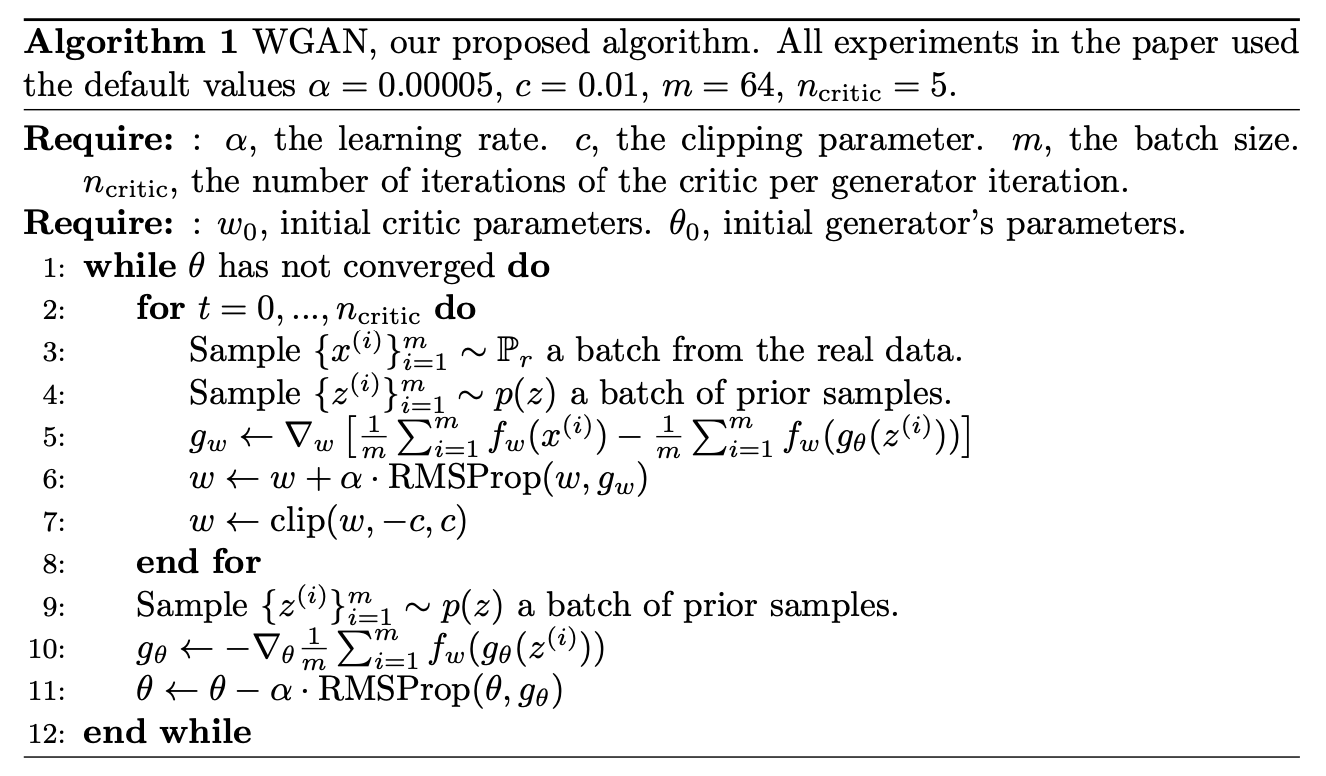

Note that
- we clip the domain of parameters to enforce Lipchitz continuity
- there's no $\log$ in loss functions
- the output layer is is not `nn.Sigmoid` since the discriminator now is doing **regression** on two distances, not logistic regression.

In [ ]:
...
nn.Conv2d(256, 1, 4, 2, 1, bias=False),
# nn.Sigmoid()

In [ ]:
real_loss = torch.mean(real_out)
fake_loss = torch.mean(fake_out)

d_loss = real_loss-fake_loss

## PyTorch implementation

In [14]:
import itertools
import math

import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
from IPython import display

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [13]:
def same_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

same_seed(0)

In [16]:
config = {
    'lr':0.0002,
    'n_epoch':13,
    'batch_size':64,
    'n_critic':1,
    'c':0.01,
}

In [4]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)

In [17]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

Get rid of the sigmoid function.

In [18]:
class Discriminator(nn.Module):

    def __init__(self):
        super(Discriminator,self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Dropout2d(0.25),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Conv2d(256, 1, 4, 2, 1, bias=False),
            # nn.Sigmoid()
        )
    def forward(self,x):
        output = self.model(x)
        output = output.view(-1,1).squeeze(1)
        return output

In [19]:
class Generator(nn.Module):

    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
                nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
                nn.BatchNorm2d(512),
                nn.ReLU(True),
                nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(True),
                nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
                nn.BatchNorm2d(128),
                nn.ReLU(True),
                nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
                nn.BatchNorm2d(64),
                nn.ReLU(True),
                nn.ConvTranspose2d(64, 1, 1, 1, 2, bias=False),
                nn.Tanh()
            )

    def forward(self, x):
        output = self.model(x)
        return output

In [20]:
D = Discriminator().to(device)
G = Generator().to(device)
D.apply(weights_init)
G.apply(weights_init)

Generator(
  (model): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 1, kernel_size=(1, 1), stride=(1, 1), padding=(2, 2), bias=False)
    (13): Tanh()
  )
)

Use RMSprop

In [21]:
d_optimizer = torch.optim.RMSprop(D.parameters(), lr=config['lr'])
g_optimizer = torch.optim.RMSprop(G.parameters(), lr=config['lr'])

In [22]:
# Draw samples from the input distribution to inspect the generation on training
fixed_number_samples = 16
fixed_noise = Variable(torch.randn(fixed_number_samples, 100,1,1)).to(device)

### Noticeable differences
- Use the mean of labels as our loss function and don't use log.
- Clip the weights to achieve Lipchitz continuity.

One should be careful that the loss of critic is **fake-real** since in the paper, the update rule is
$$
w \longleftarrow w+\alpha\cdot RMSprop(w,g_w)
$$
different from 
$$
w \longleftarrow w-\alpha\cdot RMSprop(w,g_w)
$$
which we usually use. To perform the familiar second one, we should change the sign of the loss function.

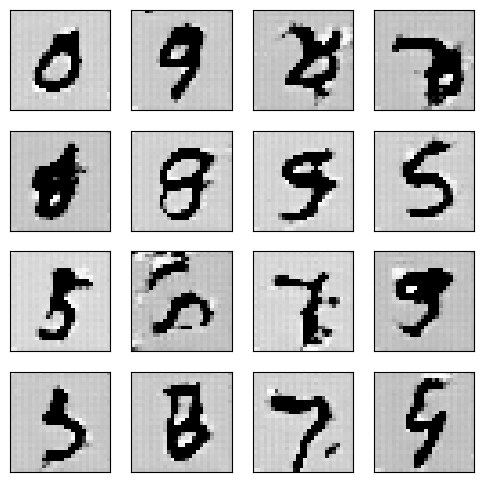

epoch: 12
d_loss: tensor(-0.1917, device='cuda:0', grad_fn=<AddBackward0>) g_loss: tensor(0.0552, device='cuda:0', grad_fn=<NegBackward0>)


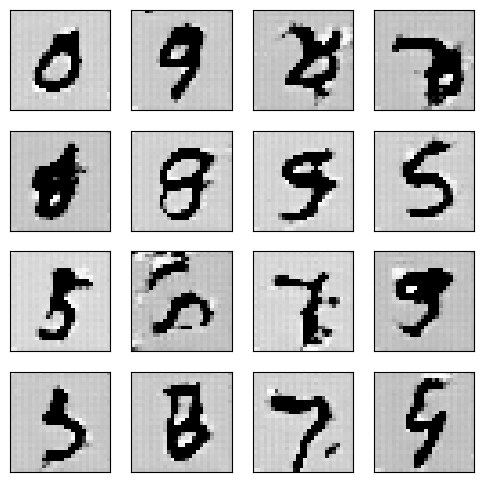

In [24]:
size_figure_grid = int(math.sqrt(fixed_number_samples))
fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(6, 6))
for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
    ax[i,j].get_xaxis().set_visible(False)
    ax[i,j].get_yaxis().set_visible(False)

for epoch in range(config['n_epoch']):
    for n, (batch_imgs, _) in enumerate(train_loader):

        for i in range(config['n_critic']):
          # Train discriminator
          D.zero_grad()
          real_out = D(batch_imgs.to(device))
          real_loss = torch.mean(real_out)

          noise_vectors = torch.randn(batch_imgs.size()[0],100,1,1)
          fake_imgs = G(noise_vectors.to(device))
          fake_out = D(fake_imgs.to(device))
          fake_loss = torch.mean(fake_out)
          
          # fake minus real!!!
          d_loss = -real_loss+fake_loss
          d_loss.backward()
          d_optimizer.step()

          # Clipping
          for p in D.parameters():
              p.data.clamp_(-config['c'], config['c'])

        # Train generator
        G.zero_grad()
        noise_vectors = torch.randn(batch_imgs.size()[0],100,1,1)
        fake_imgs = G(noise_vectors.to(device))
        fake_out = D(fake_imgs.to(device))

        g_loss = -torch.mean(fake_out)
        g_loss.backward()
        g_optimizer.step()

        if (n+1) % 100 == 0:
            test_images = G(fixed_noise.to(device))
            test_images = test_images.data.cpu().numpy().reshape(test_images.size()[0],28, 28)
            for k in range(fixed_number_samples):
                i = k//4
                j = k%4
                ax[i,j].cla()
                ax[i,j].imshow(test_images[k], cmap='Greys')
            display.clear_output(wait=True)
            display.display(plt.gcf())
            print('epoch:',epoch)
            print('d_loss:',d_loss,'g_loss:',g_loss)



### Observation
One can observe that the performance of WGAN is much better than the (vanilla) GAN even with few training epochs. Fantastic!

## References
- Wasserstein GAN, https://arxiv.org/abs/1701.07875
- https://github.com/Machine-Learning-Tokyo/Intro-to-GANs/tree/master/WassersteinGAN